# Results of different #agent values

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset=['planner','damage','num_agents'])
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()

results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,BottomUpScannerPlanner,50,10.0,2.0,5.0,115.233317,0.001111,3256.005487,50.0
1,BottomUpScannerPlanner,100,10.0,2.0,5.0,118.609863,0.003449,6803.906256,100.0
2,BottomUpScannerPlanner,200,10.0,2.0,5.0,119.819524,0.012217,13943.777590,200.0
3,BottomUpScannerPlanner,300,10.0,2.0,5.0,115.806098,0.021104,19770.989372,300.0
4,BottomUpScannerPlanner,400,10.0,2.0,5.0,115.176885,0.031945,25906.936075,400.0


In [77]:
planners_names = ['StaticLinePlanner', 'SeparateStaticPlanner', 'TravelingLinePlanner',
                  'Practical100TravelingLinePlanner',
                  'SeparateTravelingPlanner', 'IterativeAssignmentPlanner', 'KmeansAssignmentPlanner',
                  'BottomUpScannerPlanner', 'TopDownScannerPlanner', 'High100TravelingLinePlanner']
# planners_names = ['High100TravelingLinePlanner', 'High2TravelingLinePlanner','TopDownScannerPlanner']

for name in planners_names:
    print(f'{name}: {results[results.planner == name].shape[0]}')

planners_results = [results.loc[results['planner'] == name] for name in planners_names]
planners_results[0].head(11)

StaticLinePlanner: 11
SeparateStaticPlanner: 11
TravelingLinePlanner: 6
Practical100TravelingLinePlanner: 0
SeparateTravelingPlanner: 11
IterativeAssignmentPlanner: 11
KmeansAssignmentPlanner: 0
BottomUpScannerPlanner: 11
TopDownScannerPlanner: 11
High100TravelingLinePlanner: 11


,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
66,StaticLinePlanner,50,10.0,2.0,5.0,142.759716,0.002949,7030.409562,35.6
67,StaticLinePlanner,100,10.0,2.0,5.0,151.574949,0.011827,13973.069782,75.5
68,StaticLinePlanner,200,10.0,2.0,5.0,147.770799,0.033365,28519.569305,142.3
69,StaticLinePlanner,300,10.0,2.0,5.0,149.364406,0.068721,42456.901683,216.7
70,StaticLinePlanner,400,10.0,2.0,5.0,147.765861,0.127969,56135.125012,290.0
71,StaticLinePlanner,500,10.0,2.0,5.0,147.826628,0.198671,71520.172546,354.0
72,StaticLinePlanner,600,10.0,2.0,5.0,150.201092,0.500946,84455.519174,440.9
73,StaticLinePlanner,700,10.0,2.0,5.0,150.527412,0.481927,98978.562630,512.3
74,StaticLinePlanner,800,10.0,2.0,5.0,150.660237,0.452502,113441.720155,583.2
75,StaticLinePlanner,900,10.0,2.0,5.0,150.602643,0.535552,126777.082167,660.6


## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

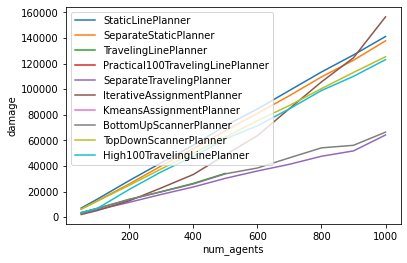

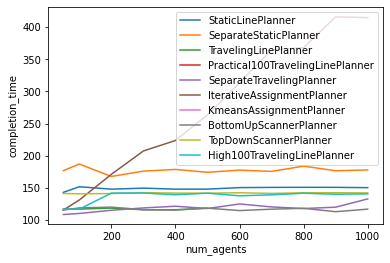

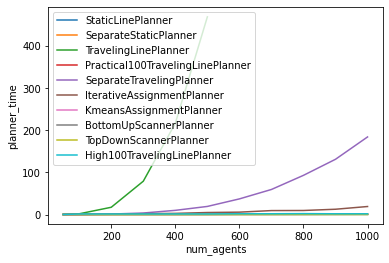

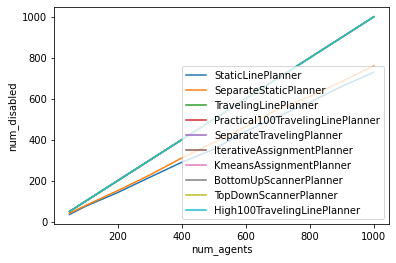

In [78]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]), list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()